# Titanic
**Data Analysis**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

The first step is to read the csv file, in this case 'titanic.csv'

In [26]:
df = pd.read_csv('../Data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Then we are going to do is to look any missing data.

In [27]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

If we are looking for
- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age

We need to clean the data that could leads us to biased information, so we are goint to eliminate the rows with missing **Ages** because we are not going to work with **Embarked** or **Cabin** variables.


In [6]:
df = df.dropna(subset=['Age']) 
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Then we reset the index with the resulting data.

In [7]:
df = df.reset_index(drop=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
709,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
710,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
711,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
712,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


For the last arrengment I'm going to change the **Survived** column; instead of 0 I would put 'No' and instead of 1 I would put 'Yes'. 

In [8]:
df['Survived'] = df['Survived'].apply(lambda x: 'No' if x == 0 else 'Yes')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
709,886,No,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
710,887,No,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
711,888,Yes,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
712,890,Yes,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


So now I' am going to get the general information of the data set and them I'am going to examine individually the variables that are involved in this study:
- Survived
- Age
- Pclass
- Gender

### Data Info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    object 
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 67.1+ KB


### Variables of interest

**Survival**

In [10]:
survived_ct = df['Survived'].value_counts()
survived_ct

No     424
Yes    290
Name: Survived, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

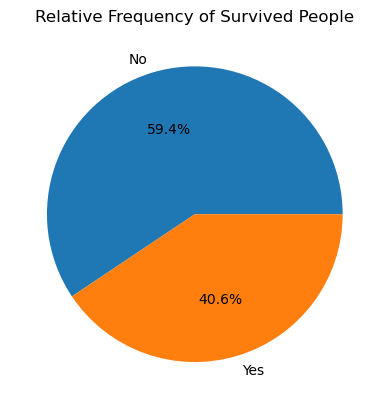

In [11]:
plt.pie(survived_ct, labels = survived_ct.index, autopct='%1.1f%%')
plt.title ('Relative Frequency of Survived People')
plt.show

We can notice that the people that 290 (40.6%) of the people survived, and 424 (59,4%) did not.

**Ticket Class**

In [12]:
pclass_ct = df['Pclass'].value_counts()
pclass_ct

3    355
1    186
2    173
Name: Pclass, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

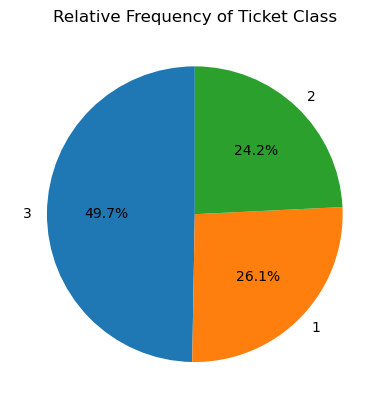

In [13]:
plt.pie(pclass_ct, labels = pclass_ct.index, autopct='%1.1f%%', startangle = 90)
plt.title ('Relative Frequency of Ticket Class')
plt.show

About the ticket class we can notice that the third class was almost the half of the sample with 355 passagers(49.7%), the second class with 173 (24.25) and the first class with 186 (26.1%)

**Sex**

In [14]:
sex_ct = df['Sex'].value_counts()
sex_ct 

male      453
female    261
Name: Sex, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

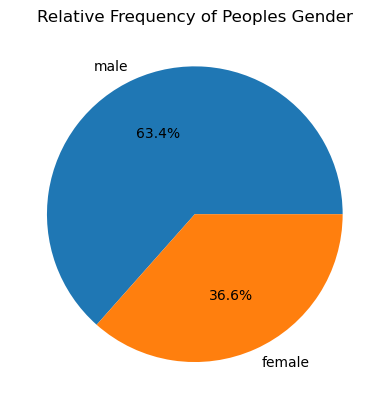

In [15]:
plt.pie(sex_ct, labels = sex_ct.index, autopct='%1.1f%%')
plt.title ('Relative Frequency of Peoples Gender')
plt.show

About the gender, the sample is compose with 453 (63.4%) and 261 (36.6%) females.

**Age in years**

In [29]:
df.describe()[['Age']]

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


<function matplotlib.pyplot.show(close=None, block=None)>

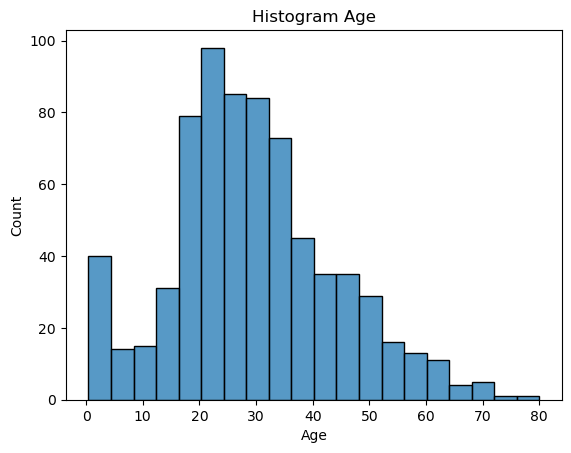

In [30]:
sns.histplot(data=df['Age'])
plt.title ('Histogram Age')
plt.show

For the age we can notice that the median is 28 and the mean is 30, so they are close; in a range between 0 and 80 years old.

### Analysis 

#### 1. Determine if the survival rate is associated to the class of passenger

In [31]:
df_pclass_sur = df.groupby(['Pclass', 'Survived']).size().unstack()
df_pclass_sur

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<function matplotlib.pyplot.show(close=None, block=None)>

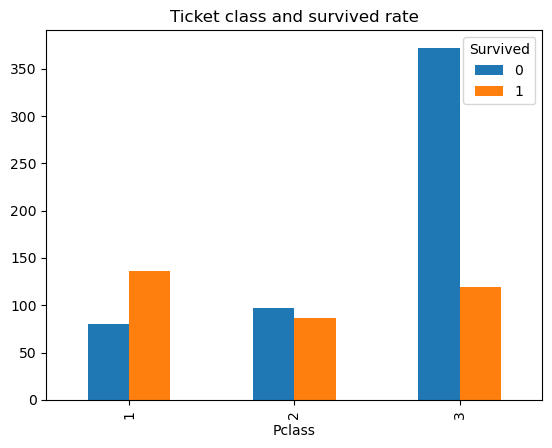

In [32]:
df_pclass_sur.plot (kind = 'bar')
plt.title ('Ticket class and survived rate')
plt.show

The first thing that we can comment it's that the bars don't look alike, so there is possible that this two variables are not independent.
- H0: The survival rate and passenger class are indepedent

- Ha: The survival rate and passenger class are not indepedent

In [46]:
chi2, p, dof, expected = stats.chi2_contingency(df_pclass_sur)
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

Chi-squared statistic: 102.88898875696056
p-value: 4.549251711298793e-23
Degrees of freedom: 2


Since 102.88 is greater than the DP. We reject H0. In consequence, the survival rate and passenger class are not independent.

The second thing is that in first class there are more people that survived, in second class the numbers are very similar but there is more people that did not survive and in third class we can see how high is the number of people that did not survived.

#### 2. Determine if the survival rate is associated to the gender

In [20]:
df_sex_sur = df.groupby(['Sex', 'Survived']).size().unstack()
df_sex_sur

Survived,No,Yes
Sex,,
female,64,197
male,360,93


<function matplotlib.pyplot.show(close=None, block=None)>

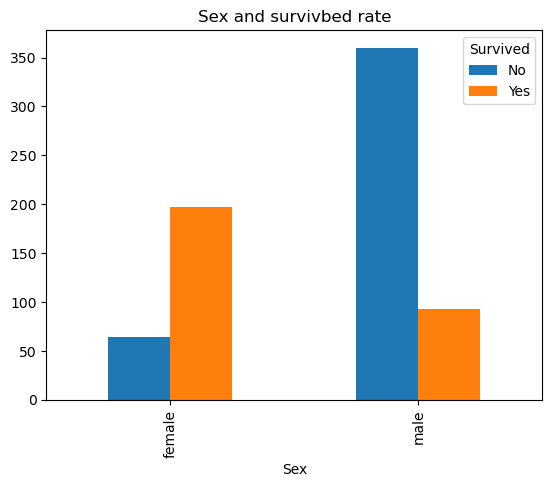

In [21]:
df_sex_sur.plot (kind = 'bar')
plt.title ('Sex and survivbed rate')
plt.show

The first thing that we can comment it's that in this case, also, the bars don't look alike, so there is possible that this two variables are dependent.
- H0: The survival rate and gender are indepedent

- Ha: The survival rate and gender are not indepedent

In [47]:
chi2, p, dof, expected = stats.chi2_contingency(df_sex_sur)
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

Chi-squared statistic: 205.02582752855906
p-value: 1.6716678441395297e-46
Degrees of freedom: 1


Since 205.02 is greater than the DP. We reject H0. In consequence, the survival rate and passenger class are not independent.

The second thing is we can see the difference on survival rates between the two genders.

#### 3. Determine the survival rate is associated to the age

<function matplotlib.pyplot.show(close=None, block=None)>

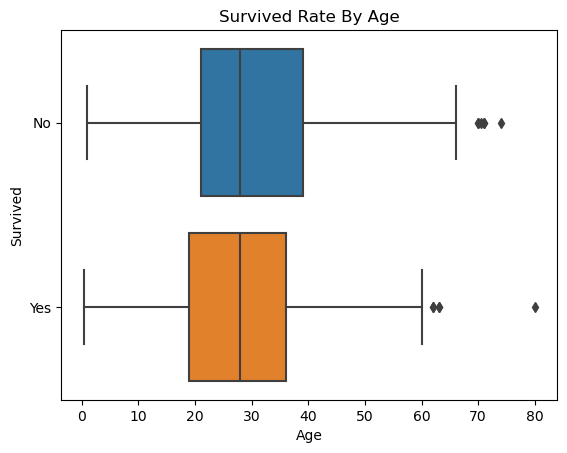

In [22]:
sns.boxplot (x = 'Age', y = 'Survived', data = df)
plt.title ('Survived Rate By Age')
plt.show

In [23]:
df_age = df[['Age', 'Survived']]
df_age.head()

,Age,Survived
0,22.0,No
1,38.0,Yes
2,26.0,Yes
3,35.0,Yes
4,35.0,No


In [24]:
df_age_ysur = df_age[df_age['Survived']=='Yes']['Age']
df_age_ysur.describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [25]:
df_age_nsur = df_age[df_age['Survived']=='No']['Age']
df_age_nsur.describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

In this comparison we can see how the median of both class are the same (28 years old) but there is a tiny diference between the means, the mean of the people who survived is 28, lower than the mean of the people who did not survived which is 31. 